# Chapter 2: End-to-End Machine Learning Projects
## Working with real data
In this chapter we chose the California Housing Prices dataset from the StatLib

## I. Looking at the Big Picture and Frame the Problem
### Looking at the big picture
1. Metrics:the population, median income, median hous‐ing price, and so on for each block group in California
2. Block groups: Districts
3. Build a model to learn this data tp predict median housing price in any district
### Frame the Problem
1. What exactly is the business objective?
2. How does the company expect to use and benefit from this model?
##### data pipeline
A sequence of data processing components.
Pipelines are very common in ML system, since there is a lot of data to manipulate and transformations

## Select a Performance Measure
RMSE

## Check Assumption
list and  verify the assumptions that were made so far; this can catch serious issues early on

## II. Get the Data
### Create workspace
### Download the Data

In [1]:
import os
import tarfile

import numpy as np
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [2]:
def fetch_housing_data(housing_url, housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

In [4]:
import pandas as pd
def loading_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = loading_housing_data()

##### take a look at top five

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### take a quick description of data, using info()

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Summary the numerical data, using describe()

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Plot histogram for each numerical attribute

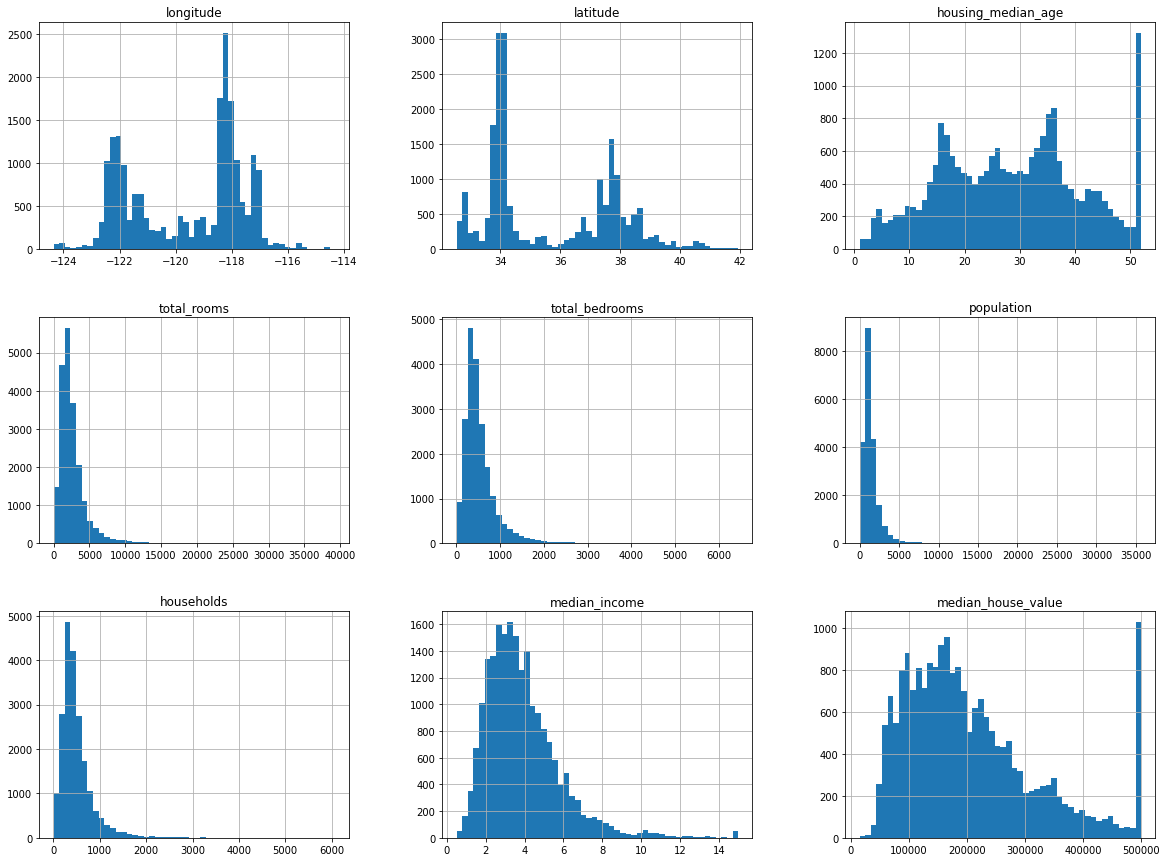

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,15))
plt.show()

### Create Test Set
Data snooping is a from of statical bias manipulating data to get significant results

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

So far, we consider purely random sampling method, this is fine if your dataset is large enough. But if it is not, you run the risk of introducing a significant bias.
Stratified sampling: the population is divided into homogenous subgroup cal strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population

In [11]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

Ensure that the test set is representative of the various categories of the income of the whole dataset
First: median income is a continuous numerical attribute, create an income category attribute

In [12]:
housing['income_cat']

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

it is importance to have sufficient number of instances in your dataset for each stratum else leading to biased
This means that you should not have too many strata, each stratum should be large enough

In [13]:
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [16]:
strat_test_set['income_cat'].value_counts()

3.0    1447
2.0    1316
4.0     728
5.0     472
1.0     165
Name: income_cat, dtype: int64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1,  inplace = True)

In [18]:
set_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


## III. Discover and Visualize the Data to Gain the Insights

#### Visualize Geographical Data
After take a quick glance at the data, now the goal is to go a little more in depth
First, explore only the training set. In our case, the training set is quite small, if it too large, you may want to sample exploration set

In [19]:
# let's create a coppy so you can play without harming the training set
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

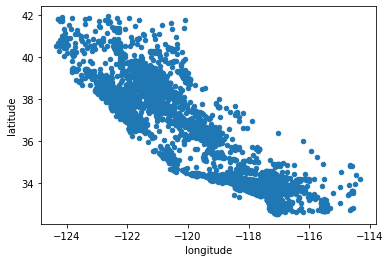

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

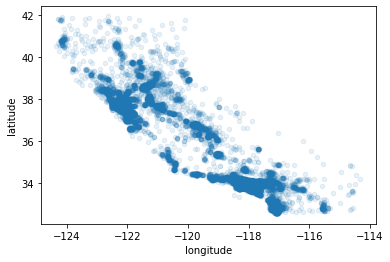

In [21]:
# setting alpha = 0.1, to see particular pattern - the high density areas
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

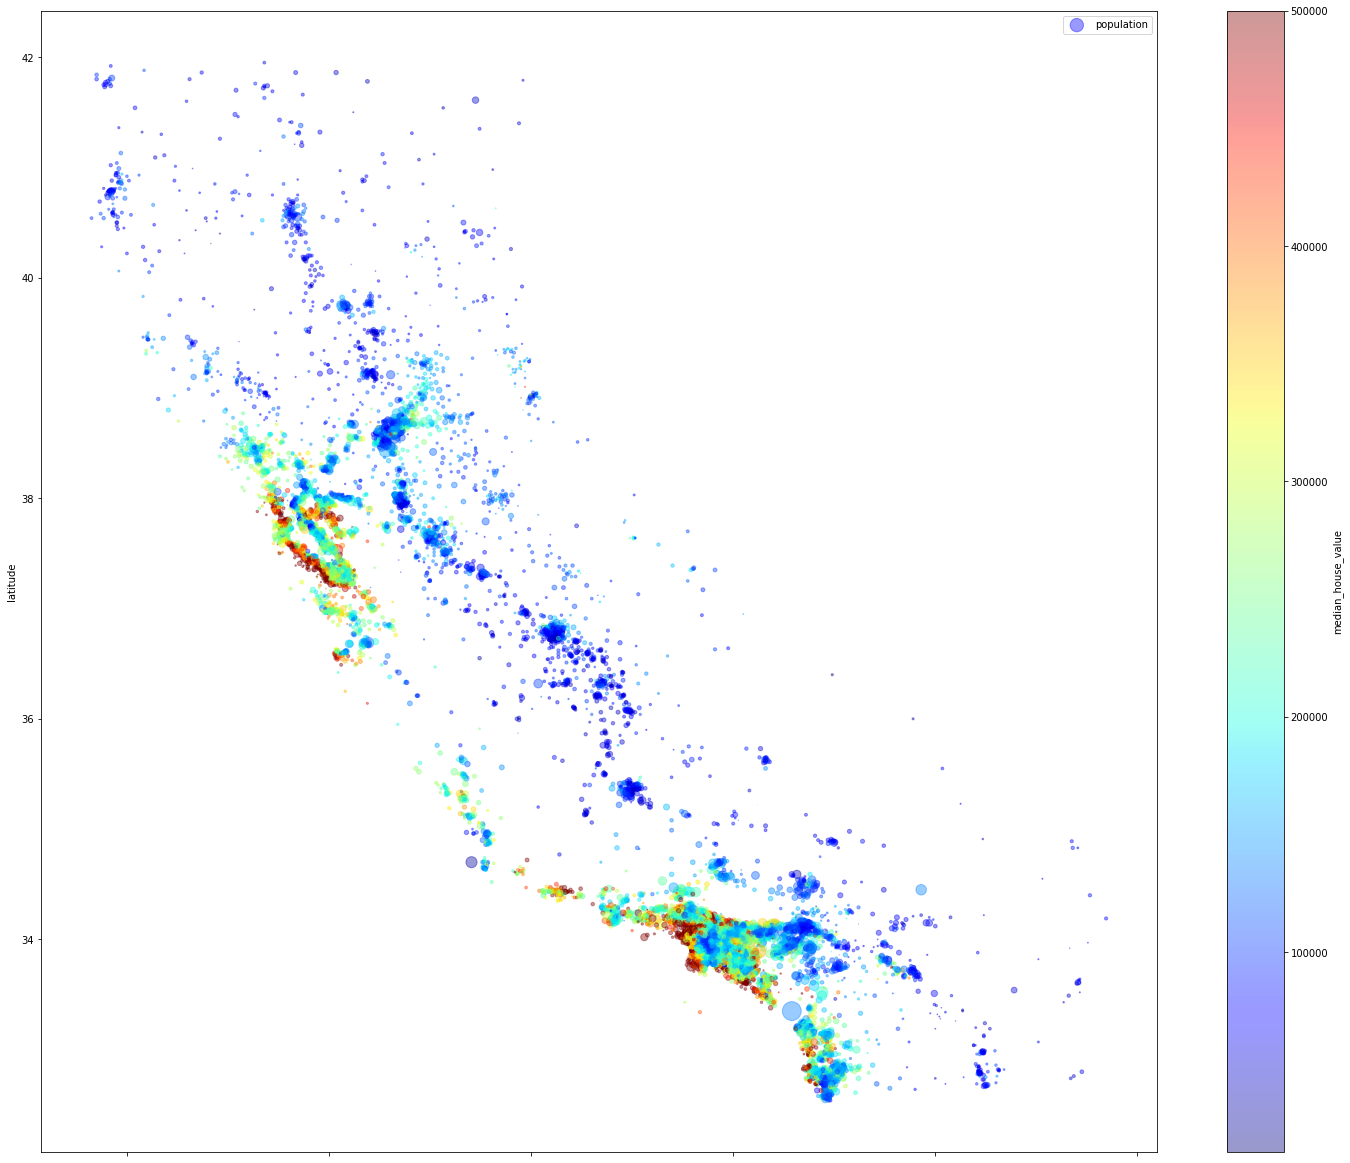

In [22]:
# visualize more information, by using radius and color of each circle
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(25,21),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

### Looking for Correlations

In [23]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [24]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

##### Note: The correlation coefficient only measures linear correlations. It may completely miss out nonlinear relationships
* Using Pandas's scatter_matrix function, to check correlation

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

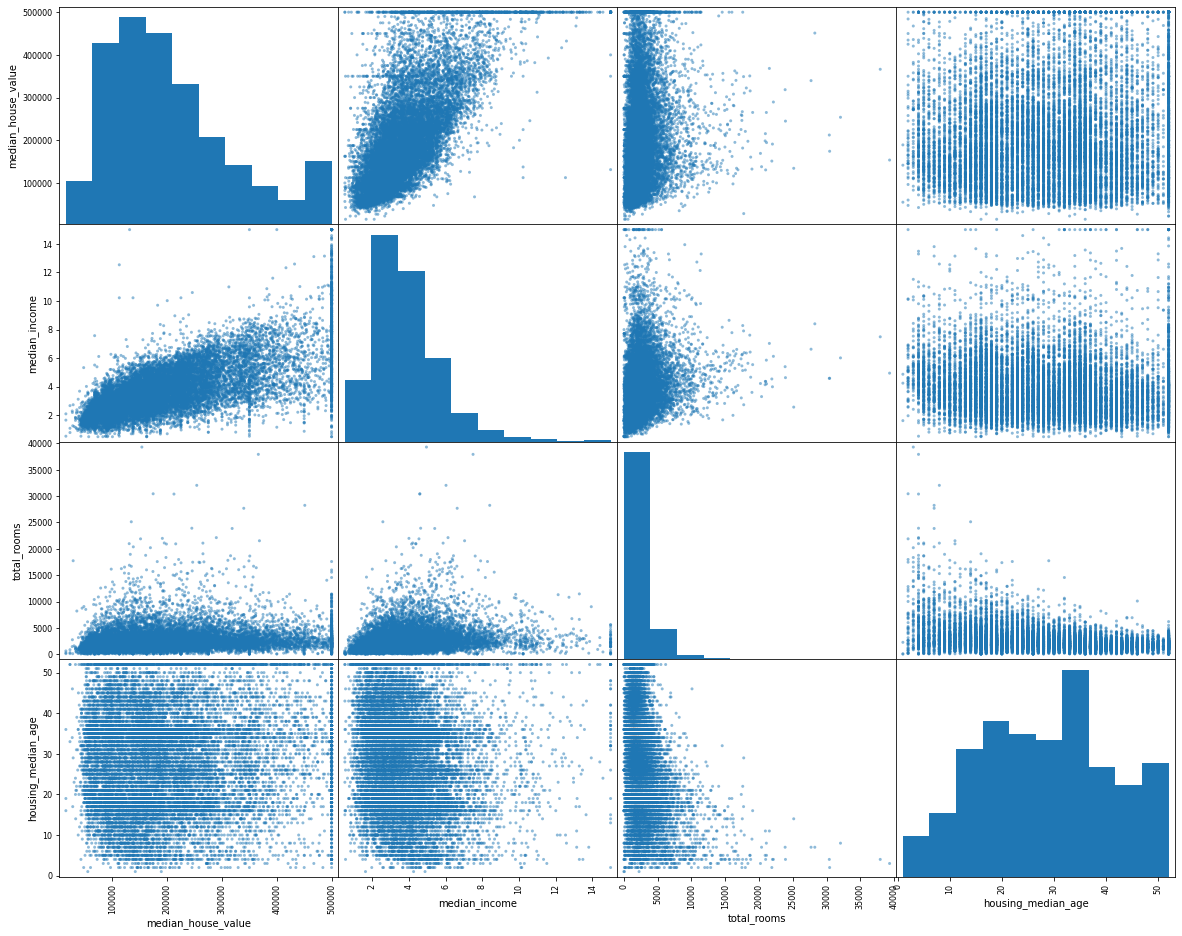

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20,16))

##### check the most promising attributes: median income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

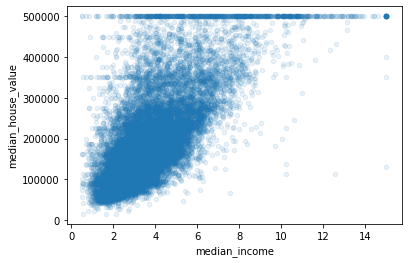

In [26]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

## Experimenting with Attribute Combinations
One lasthing before actually preparing the data for ML algorithms is to try various attribute combinations


In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [28]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## IV. Prepare Data for ML Algortihms
Write a function to prepare data:
* Reproduce these transformations easily on any dataset
* Gradually build a library of transformation functions that can reuse in future projects
* Use these functions in live system to transform the new data before feeding it to your algorithm
* Easily try various transformations and see which combination of transformations works best

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning
Machine learning algorithm cannot work with missing features.
In this projects, we have 3 options:
* Ged rid of corresponding districs
* Ged rid of the whole attribute
* Set the values to some value(zero, mean, ect.)

###### Using DataFrame's dropna(), drop(), fillna()

In [30]:
housing.dropna(subset=['total_bedrooms']) # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [31]:
housing.drop('total_bedrooms', axis=1) #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [32]:
# option 3
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

Scikit-learn provide Imputer to take care of missing vlaues

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [36]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now you can use this trained imputer to transform the training set by replacing missing values by learned medians

In [37]:
X = imputer.transform(housing_num)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [39]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Scikit-learn Design
Scikit-Learn's API is remarkable well designed. The main principles are:
#### 1. Consistency: All objects share a consistence and simple interface
* Estimator: estimated based on a dataset
* Transformer: Some estimators can transform dataset
* Predictor: Estimators are capable of making predictions
#### 2. Inspection: All the estimator's hyper-parameters are accessible directly via public instance variables, _estimator's learn parameters with underscore
#### 3. Nonproliferation of classes: Matrices -> Numpy, sparse matrices -> Scipy. Hyperparameters-> string, number
#### 4. Composition: Existing block are reused as much as possible
#### 5. Sensible defaults: provide default values for most parameters

### Handling Text and Categorical Attributes


In [41]:
# Cannot compute median of categorical attribute
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Most ML algorithm prefer to work with numbers.
Pandas's factorize() method to map each category to a different integer

In [42]:
housing_cat_encoded, housing_cat_categories = housing_cat.factorize()

In [47]:
housing_cat_encoded

array([0, 1, 0, ..., 2, 2, 0], dtype=int64)

In [48]:
housing_cat_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

Scikit-learn provide one hot encoding -> ML algorithms will treat better for each categorical


In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

fit_transform() expects 2D array

In [51]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Or
Using LabelEncoder and OnehotEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder
cat_encoder = LabelEncoder()

In [251]:
encoder.fit(cat_encoder.fit_transform(housing_cat).reshape(-1,1))

OneHotEncoder()

In [58]:
housing_cat_1hot = encoder.fit_transform(cat_encoder.fit_transform(housing_cat).reshape(-1, 1))

In [59]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

###### Large number of possible categories -> onehot encoded large number of input features -> slow down training, degrade performance -> embedding -> not now

### Custom Transformer
Some time you need to write for specific tasks
Import BaseEstimator, TransformerMixin to get extra methods (get_params(), set_params())

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

In [63]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [107]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [68]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [69]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [70]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [71]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


### Feature Scaling
Ml algorithms don't perform well when input numerical attributes have very different scales
There are two common ways to get all attributes to have same scale: min-max scaling, standardization

In [82]:
a = np.arange(20).reshape(-1,2)

In [88]:
a

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [89]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
scaler.fit(a)

MinMaxScaler()

In [92]:
scaler.data_max_

array([18., 19.])

In [93]:
scaler.transform(a)

array([[0.        , 0.        ],
       [0.11111111, 0.11111111],
       [0.22222222, 0.22222222],
       [0.33333333, 0.33333333],
       [0.44444444, 0.44444444],
       [0.55555556, 0.55555556],
       [0.66666667, 0.66666667],
       [0.77777778, 0.77777778],
       [0.88888889, 0.88888889],
       [1.        , 1.        ]])

In [94]:
standar_scaler = StandardScaler()
standar_scaler. fit(a)

StandardScaler()

In [95]:
standar_scaler.transform(a)

array([[-1.5666989 , -1.5666989 ],
       [-1.21854359, -1.21854359],
       [-0.87038828, -0.87038828],
       [-0.52223297, -0.52223297],
       [-0.17407766, -0.17407766],
       [ 0.17407766,  0.17407766],
       [ 0.52223297,  0.52223297],
       [ 0.87038828,  0.87038828],
       [ 1.21854359,  1.21854359],
       [ 1.5666989 ,  1.5666989 ]])

In [96]:
abs_scaler = MaxAbsScaler()
abs_scaler.fit(a)

MaxAbsScaler()

In [97]:
abs_scaler.transform(a)

array([[0.        , 0.05263158],
       [0.11111111, 0.15789474],
       [0.22222222, 0.26315789],
       [0.33333333, 0.36842105],
       [0.44444444, 0.47368421],
       [0.55555556, 0.57894737],
       [0.66666667, 0.68421053],
       [0.77777778, 0.78947368],
       [0.88888889, 0.89473684],
       [1.        , 1.        ]])

### Transformation Pipelines
There are many data transformation steps, need to be executed in right order.
Import Pipeline class to help with such sequences of transformation

In [98]:
from sklearn.pipeline import Pipeline


In [108]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [109]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

There is nothing in Scikit-Learn to handle DataFrame, but we can write a custom transformer for this task

In [184]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
     def __init__(self, attribute_names):
        self.attribute_names = attribute_names
     def fit(self, X):
        return self
     def transform(self, X):
        return X[self.attribute_names].values

In [196]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs)),
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

In [186]:
num_pipeline.fit_transform(housing)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [187]:
cat_pipeline = Pipeline(steps=[
     ('selector', DataFrameSelector(cat_attribs)),
 ])

In [188]:

categorical_attr = cat_pipeline.fit_transform(housing)

In [237]:
class MyLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        super(MyLabelEncoder, self).__init__()
        self.enconder = LabelEncoder()
    def fit(self, X, y = None):
        self.enconder.fit(X)
        return self
    def transform(self, X, y=None):
        return self.enconder.transform(X)

In [277]:
class MyOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        super(MyOneHotEncoder, self).__init__()
        self.onehot = OneHotEncoder()
        self.label_encoder = LabelEncoder()
    def fit(self, X, y = None):
        self.onehot.fit(self.label_encoder.fit_transform(X).reshape(-1,1))
        return self
    def transform(self, X, y=None, **fit_params):
        return self.onehot.transform(self.label_encoder.fit_transform(X).reshape(-1, 1)).toarray()

In [278]:
cat_pipeline2 =Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot', MyLabelEncoder()),
])

In [279]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot', MyOneHotEncoder()),
])

In [280]:
cat_pipeline.fit_transform(housing)

A:\Hands_on_ML\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
A:\Hands_on_ML\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [207]:
housing[cat_attribs]

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [159]:
cat_encoder

LabelEncoder()

 Using FeatureUnion to join two pipeline

In [134]:
from sklearn.pipeline import FeatureUnion

In [258]:
full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [259]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [282]:
housing_prepared = full_pipeline.fit_transform(housing)

A:\Hands_on_ML\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
A:\Hands_on_ML\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [261]:
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

# V. Select And Train Model

In [283]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [284]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [285]:
some_labels = housing_labels.iloc[:5]
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [266]:
some_data_prepared = full_pipeline.transform(some_data)

A:\Hands_on_ML\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [287]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90814345 430492.95481865 152056.4540512  311096.0573424
 244550.6745217 ]


In [288]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [289]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390019036

In [290]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It could be overfit the data

## Better Evaluation Using Cross-Validation
Using Sckit-Learn's K-fold cross-validation feature.
-> Randomly split set into 10 distinct subset called folds, then it train and evaluate 10 times, for everytime it trains on 9 folds.

In [291]:
from sklearn.model_selection import cross_val_score

In [292]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

Scikit-learn's cross-validation feature expect a utility function( greater is better) rather than a cost function(lower is better), so the scoring function is  actually the opposite of the MSE, so we need -score

In [293]:
def display_score(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation', scores.std())

In [296]:
# it's not zero anymore
display_score(scores)

Scores:  [-5.30253059e+09 -4.88509393e+09 -4.63351692e+09 -5.14152906e+09
 -4.84573753e+09 -6.06165289e+09 -5.25805122e+09 -5.54348466e+09
 -4.64031494e+09 -5.16488276e+09]
Mean:  -5147679448.756802
Standard deviation 413570517.00529134


In [297]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(lin_scores)

C:\Users\HOME\AppData\Local\Temp\ipykernel_14504\2520419580.py:3: RuntimeWarning: invalid value encountered in sqrt
  lin_rmse_scores = np.sqrt(lin_scores)


In [298]:
display_score(lin_scores)

Scores:  [-5.14989428e+09 -4.11073212e+09 -4.59293109e+09 -4.71078941e+09
 -4.46840697e+09 -5.26031620e+09 -5.47556780e+09 -4.73376144e+09
 -4.41471057e+09 -4.91959158e+09]
Mean:  -4783670145.425314
Standard deviation 398880942.141501


The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.


In [299]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [300]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse


18705.982203580792

In [302]:
forest_score = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)

In [303]:
forest_score = np.sqrt(forest_score)
display_score(forest_score)df_ppn1['ak_check']=ak_check
df_ppn1['number_component']=number_component
df_ppn1['port_constrains'] = port_constrains

Scores:  [nan nan nan nan nan nan nan nan nan nan]
Mean:  nan
Standard deviation nan


C:\Users\HOME\AppData\Local\Temp\ipykernel_14504\1439061155.py:1: RuntimeWarning: invalid value encountered in sqrt
  forest_score = np.sqrt(forest_score)


Save every model to come back

In [304]:
from joblib import dump, load
dump(forest_reg, 'forest_test.pkl')

['forest_test.pkl']

In [305]:
my_loaded_model = load('forest_test.pkl')

## Fine-Tune Model

### Grid Search
###### Scikit-Learn's GridSearchCV to search hyperparameter

In [306]:
from sklearn.model_selection import GridSearchCV

In [307]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [308]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [309]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [310]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [312]:
grid_search.best_score_

-2491094918.4816

In [313]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

### Randomized Search